Umbral simple:

Aquí el asunto es sencillo. Para cada píxel, se aplica el mismo valor de umbral. Si el valor del píxel es menor que el umbral, se establece en 0; de lo contrario, se establece en un valor máximo. La función cv.threshold se utiliza para aplicar el umbral. El primer argumento es la imagen de origen, que debería ser una imagen en escala de grises . El segundo argumento es el valor umbral que se utiliza para clasificar los valores de píxeles. El tercer argumento es el valor máximo que se asigna a los valores de píxeles que superan el umbral. OpenCV proporciona diferentes tipos de umbrales que vienen dados por el cuarto parámetro de la función. El umbral básico descrito anteriormente se realiza utilizando el tipo cv.THRESH_BINARY . Todos los tipos de umbrales simples son:

 -cv.THRESH_BINARY

 -cv.THRESH_BINARY_INV

 -cv.THRESH_TRUNC

 -cv.THRESH_TOZERO
 
 -cv.THRESH_TOZERO_INV

El método devuelve dos salidas. El primero es el umbral que se utilizó y el segundo resultado es la imagen con umbral .

Este código compara los diferentes tipos de umbrales simples:

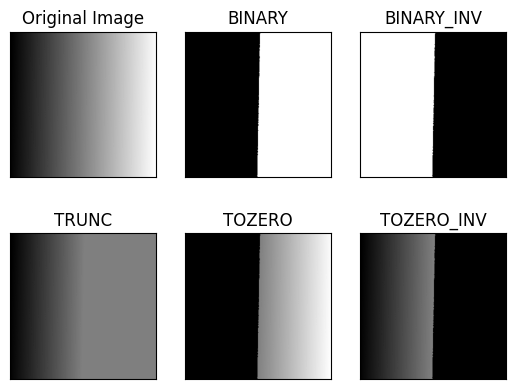

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('resources/gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Umbral adaptativo:

En la sección anterior, utilizamos un valor global como umbral. Pero esto puede no ser bueno en todos los casos, por ejemplo, si una imagen tiene diferentes condiciones de iluminación en diferentes áreas. En ese caso, el umbral adaptativo puede ayudar. Aquí, el algoritmo determina el umbral para un píxel basándose en una pequeña región a su alrededor. De esta manera obtenemos diferentes umbrales para diferentes regiones de la misma imagen, lo que da mejores resultados para imágenes con iluminación variable.

Además de los parámetros descritos anteriormente, el método cv.adaptiveThreshold toma tres parámetros de entrada:

El adaptiveMethod decide cómo se calcula el valor umbral:

cv.ADAPTIVE_THRESH_MEAN_C : El valor umbral es la media del área de vecindad menos la constante C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C : El valor umbral es una suma ponderada gaussiana de los valores de vecindad menos la constante C.
blockSize determina el tamaño del área vecina y C es una constante que se resta de la media o suma ponderada de los píxeles vecinos .

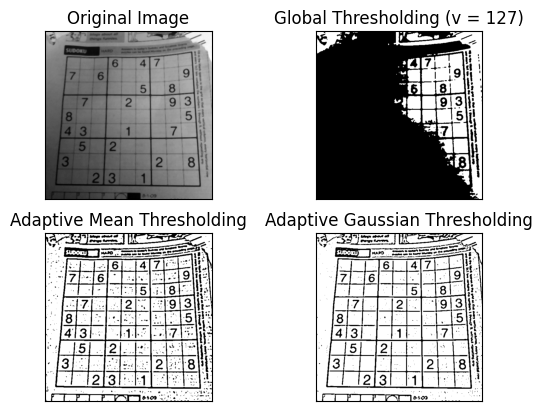

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('resources/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Binarización de Otsu:

En el umbral global, utilizamos un valor elegido arbitrariamente como umbral. Por el contrario, el método de Otsu evita tener que elegir un valor y lo determina automáticamente.

Considere una imagen con solo dos valores de imagen distintos ( imagen bimodal ), donde el histograma solo consistiría en dos picos. Un buen umbral estaría entre esos dos valores. De manera similar, el método de Otsu determina un valor umbral global óptimo a partir del histograma de la imagen.

Para hacerlo, se utiliza la función cv.threshold() , donde cv.THRESH_OTSU se pasa como un indicador adicional. El valor umbral se puede elegir arbitrariamente. Luego, el algoritmo encuentra el valor umbral óptimo que se devuelve como primera salida.

Mira el ejemplo a continuación. La imagen de entrada es una imagen ruidosa. En el primer caso, se aplica un umbral global con un valor de 127. En el segundo caso, el umbral de Otsu se aplica directamente. En el tercer caso, la imagen primero se filtra con un núcleo gaussiano de 5x5 para eliminar el ruido y luego se aplica el umbral Otsu. Vea cómo el filtrado de ruido mejora el resultado.

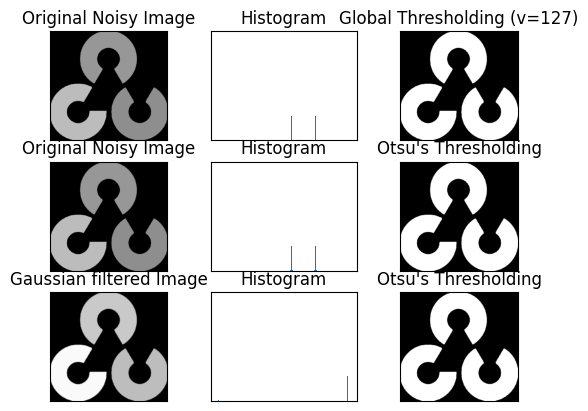

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('resources/opencv-logo.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()